In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
data = pd.read_csv("/content/drive/MyDrive/Errors.csv")
data.head()

,Domain,Employee ID,Error Frequency,Type of Error,Avg. Module Time (min),Avg. Resolution Time (min)
0,Software Development,EMP001,Daily,Syntax,45,5
1,Software Development,EMP002,Weekly,Logical,120,60
2,Data Analysis,EMP003,Monthly,Dependency,90,120
3,Data Analysis,EMP004,Daily,Logical,60,45
4,DevOps,EMP005,Weekly,Dependency,180,180


In [31]:
df = data.copy()
df.head()

,Domain,Employee ID,Error Frequency,Type of Error,Avg. Module Time (min),Avg. Resolution Time (min)
0,Software Development,EMP001,Daily,Syntax,45,5
1,Software Development,EMP002,Weekly,Logical,120,60
2,Data Analysis,EMP003,Monthly,Dependency,90,120
3,Data Analysis,EMP004,Daily,Logical,60,45
4,DevOps,EMP005,Weekly,Dependency,180,180


In [32]:
!pip install kmodes

In [34]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
le = LabelEncoder()
oe = OrdinalEncoder()
df['Domain'] = le.fit_transform(df['Domain'])
df['Error Frequency'] = oe.fit_transform(df[['Error Frequency']])
df['Type of Error'] = le.fit_transform(df['Type of Error'])

In [36]:
df

,Domain,Employee ID,Error Frequency,Type of Error,Avg. Module Time (min),Avg. Resolution Time (min)
0,4,EMP001,0.0,2,45,5
1,4,EMP002,2.0,1,120,60
2,0,EMP003,1.0,0,90,120
3,0,EMP004,0.0,1,60,45
4,2,EMP005,2.0,0,180,180
...,...,...,...,...,...,...
95,4,EMP096,1.0,1,94,57
96,0,EMP097,0.0,0,170,175
97,2,EMP098,2.0,1,140,95
98,3,EMP099,1.0,2,35,9


In [37]:
emp_id = df['Employee ID']

In [40]:
df = df.drop(columns=['Employee ID'])
df

,Domain,Error Frequency,Type of Error,Avg. Module Time (min),Avg. Resolution Time (min)
0,4,0.0,2,45,5
1,4,2.0,1,120,60
2,0,1.0,0,90,120
3,0,0.0,1,60,45
4,2,2.0,0,180,180
...,...,...,...,...,...
95,4,1.0,1,94,57
96,0,0.0,0,170,175
97,2,2.0,1,140,95
98,3,1.0,2,35,9


In [58]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1eo2yes0oHqG4u22g5hcC0u3pes5aRvFUgJx5Rrq5DM0#gid=0


In [42]:
#k-prototypes
cost = []
for i in range(1,11):
  kp = KPrototypes(n_clusters=i, init='Huang')
  kp.fit_predict(df, categorical=[0,2,4])
  cost.append(kp.cost_)

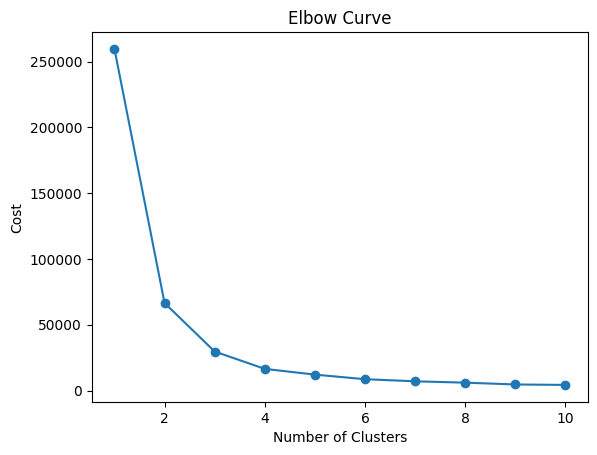

In [43]:
plt.plot(range(1,11), cost, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show()

In [45]:
#ideal number of clusters =  3
kp = KPrototypes(n_clusters=3, init='Huang')
y = kp.fit_predict(df, categorical=[0,2,4])
df['Cluster']=y
y

array([1, 0, 0, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 2,
       0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 1,
       0, 0, 2, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 0,
       2, 0, 1, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1, 0, 2,
       1, 0, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0], dtype=uint16)

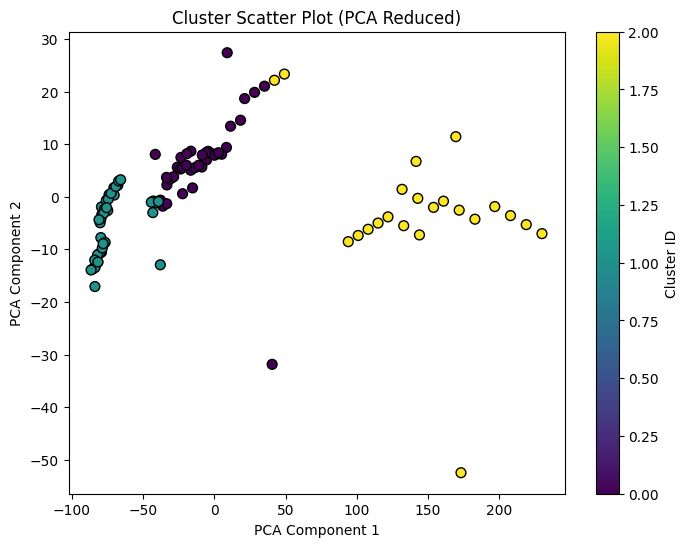

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df)

# Plot the clusters
plt.figure(figsize=(8, 6))

# Scatter plot with clusters colored differently
plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)

# Add title and labels
plt.title('Cluster Scatter Plot (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Show the color bar to represent clusters
plt.colorbar(label='Cluster ID')

# Show plot
plt.show()

In [48]:
cluster_profiles = df.groupby('Cluster').agg({
    'Error Frequency': lambda x: x.mode()[0],
    'Type of Error': lambda x: x.mode()[0],
})
print(cluster_profiles)

         Error Frequency  Type of Error
Cluster                                
0                    1.0              1
1                    2.0              2
2                    0.0              0


In [49]:
error_category_distribution = df.groupby('Cluster')['Type of Error'].value_counts(normalize=True).unstack(fill_value=0)
frequency_errors_distribution = df.groupby('Cluster')['Error Frequency'].value_counts(normalize=True).unstack(fill_value=0)
print(error_category_distribution)
print("\nFrequency of Errors Distribution:")
print(frequency_errors_distribution)

Type of Error         0         1         2
Cluster                                    
0              0.025641  0.974359  0.000000
1              0.000000  0.153846  0.846154
2              0.909091  0.090909  0.000000

Frequency of Errors Distribution:
Error Frequency       0.0       1.0       2.0
Cluster                                      
0                0.384615  0.410256  0.205128
1                0.205128  0.358974  0.435897
2                0.500000  0.136364  0.363636


In [53]:
df['Employee ID'] = emp_id
df = df.drop(columns=['Domain'])
df

KeyError: "['Domain'] not found in axis"

In [54]:
df['Domain'] = data['Domain']
df

,Error Frequency,Type of Error,Avg. Module Time (min),Avg. Resolution Time (min),Cluster,Employee ID,Domain
0,0.0,2,45,5,1,EMP001,Software Development
1,2.0,1,120,60,0,EMP002,Software Development
2,1.0,0,90,120,0,EMP003,Data Analysis
3,0.0,1,60,45,1,EMP004,Data Analysis
4,2.0,0,180,180,2,EMP005,DevOps
...,...,...,...,...,...,...,...
95,1.0,1,94,57,0,EMP096,Software Development
96,0.0,0,170,175,2,EMP097,Data Analysis
97,2.0,1,140,95,2,EMP098,DevOps
98,1.0,2,35,9,1,EMP099,QA Automation


In [55]:
efficiency_mapping = {0: "Medium-Efficiency", 1: "Low-Efficiency", 2: "High-Efficiency"}
df["Cluster"] = df["Cluster"].map(efficiency_mapping)
df.head()

,Error Frequency,Type of Error,Avg. Module Time (min),Avg. Resolution Time (min),Cluster,Employee ID,Domain
0,0.0,2,45,5,Low-Efficiency,EMP001,Software Development
1,2.0,1,120,60,Medium-Efficiency,EMP002,Software Development
2,1.0,0,90,120,Medium-Efficiency,EMP003,Data Analysis
3,0.0,1,60,45,Low-Efficiency,EMP004,Data Analysis
4,2.0,0,180,180,High-Efficiency,EMP005,DevOps


In [73]:
errors_processed.to_csv("my_data.csv", index=False)

In [75]:
from google.colab import files
files.download("my_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [71]:
errors_processed = df[['Cluster', 'Domain', 'Employee ID']].copy()
errors_processed

,Cluster,Domain,Employee ID
0,Low-Efficiency,Software Development,EMP001
1,Medium-Efficiency,Software Development,EMP002
2,Medium-Efficiency,Data Analysis,EMP003
3,Low-Efficiency,Data Analysis,EMP004
4,High-Efficiency,DevOps,EMP005
...,...,...,...
95,Medium-Efficiency,Software Development,EMP096
96,High-Efficiency,Data Analysis,EMP097
97,High-Efficiency,DevOps,EMP098
98,Low-Efficiency,QA Automation,EMP099
